# **ПРОЕКТ -  Телекоммуникации**


Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Ваша задача — обучить на этих данных модель для прогноза оттока клиентов

**Цель:**   
Построить модель,которая  будет предсказывать, разорвёт ли абонент договор.

**Задачи исследования:**   
- Провести первичный анализ данных и привести их в соответсвие   
- Разделить массив данных на  выборки.  
- Провести исследование и построить несколько прогнозных моделей.  
- Выбрать по метрикам подходящую модель. 
- Провести финальное тестирование этой модели на соответсвие и адекватность.  

**Исходные данные:**

Признаки  
- customerID — идентификатор клиента/абонента;  
- BeginDate — дата начала действия договора;  
- EndDate — дата окончания действия договора;   
- Type — тип оплаты: раз в год-два или ежемесячно;  
- PaperlessBilling — электронный расчётный лист;  
- PaymentMethod — тип платежа;  
- MonthlyCharges — расходы за месяц;  
- TotalCharges — общие расходы абонента  
- gender — пол;  
- SeniorCitizen — является ли абонент пенсионером;  
- Partner — есть ли у абонента супруг или супруга;  
- Dependents — есть ли у абонента дети;   
- InternetService — тип подключения;  
- OnlineSecurity — блокировка опасных сайтов;  
- OnlineBackup — облачное хранилище файлов для резервного копирования данных;  
- DeviceProtection — антивирус;  
- TechSupport — выделенная линия технической поддержки;  
- StreamingTV — стриминговое телевидение;  
- StreamingMovies — каталог фильмов; 
- MultipleLines — подключение телефона к нескольким линиям одновременно. 

Целевой признак   
- Exited — факт ухода клиента 

**Данное исследование разделим на несколько частей**

***Часть 1. Подготовка данных и их исследование:***
* [1.1 Загрузка библиотек и файлов](#1-bullet)
* [1.2 Датасет contract_new.Изученеие файлов с данными, получение общей информации, график.](#2-bullet)
* [1.3 Датасет personal_new.Изученеие файлов с данными, получение общей информации, график.](#3-bullet)
* [1.4 Датасет internet_new.Изученеие файлов с данными, получение общей информации.](#4-bullet)
* [1.5 Датасет phone_new.Изученеие файлов с данными, получение общей информации.](#5-bullet)
* [1.6 Клиентский анализ.](#6-bullet)

***Часть 2.Предобработка данных,разработка моделей:*** 
* [2.1 Объединение датасетов.](#7-bullet)
* [2.2 Поиск и ликвидация пропусков.](#8-bullet)
* [2.3 Создание новых признаков и удаление лишних признаков.](#9-bullet)
* [2.4 Разделение массива на  выборки и масштабирование.](#10-bullet)
* [2.5 Модель логистическая регрессия.](#11-bullet)
* [2.6 Модель случайный лес.](#12-bullet)
* [2.7 Модель CatBoost.](#13-bullet) 
* [2.8 Тестирование выбранной модели.](#14-bullet) 
* [2.9 Анализ выбранной(протестированной) модели.](#15-bullet)



***Часть 3.Отчет:***  
* [3.1 Выводы.](#16-bullet) 


 



## Подготовка данных и их исследование

<a id='1-bullet'></a>

ЗАГРУЗКА БИБЛИОТЕК

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

In [2]:
data_1 = '/datasets/contract_new.csv'
data_2 = '/datasets/personal_new.csv'
data_3 = '/datasets/internet_new.csv'
data_4 = '/datasets/phone_new.csv'

if os.path.exists(data_1):
    data_contract = pd.read_csv(data_1)
elif os.path.exists(data_2):
    data_personal = pd.read_csv(data_2)

else:
    print('Something is wrong')

In [3]:
if os.path.exists(data_2):
    data_personal = pd.read_csv(data_2)
elif os.path.exists(data_3):
    data_internet = pd.read_csv(data_3)

else:
    print('Something is wrong')

In [4]:
if os.path.exists(data_3):
    data_internet = pd.read_csv(data_3)
elif os.path.exists(data_4):
    data_phone = pd.read_csv(data_4)

else:
    print('Something is wrong')

In [5]:
if os.path.exists(data_4):
    data_phone = pd.read_csv(data_4)

else:
    print('Something is wrong')

<a id='2-bullet'></a>

ДАТАСЕТ data_contract_new

In [6]:
display(data_contract.head())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [7]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [8]:
display(data_contract['TotalCharges'].sort_values().unique())

array([' ', '100.17', '100.19', ..., '998.89', '999.6', '999.9'],
      dtype=object)

Поле TotalCharges имеет тип object и как видим в поле есть пробелы которые имеют текстовый формат, с данной проблемой будем бороться в следующем разделе

In [9]:
data_contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [10]:
display(data_contract.duplicated().sum())

0

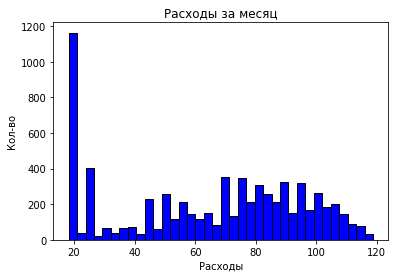

In [11]:
plt.hist(data_contract['MonthlyCharges'],color='blue',edgecolor='black', bins=int(180/5))
plt.title('Расходы за месяц')
plt.xlabel('Расходы')
plt.ylabel('Кол-во')
plt.show();


В датасете 7 043 строк и 8 колонок.  
Дубликатов не найдено. 
Ежемесячные платежи варируются от 18,25 до 118,75, где наиболее популярные платежи это 18,25 в мес., и можно сделать предположение что это базовая ежемесячная стоимость услуги

ДАТАСЕТ data_personal_new

<a id='3-bullet'></a>

In [12]:
display(data_personal.head())

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [13]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [14]:
data_personal.describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [15]:
display(data_personal.duplicated().sum())

0

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


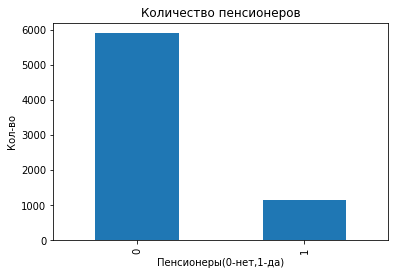

In [16]:
class_SeniorCitizen = data_personal['SeniorCitizen'].value_counts()
print(class_SeniorCitizen)
class_SeniorCitizen.plot(kind='bar')
plt.title('Количество пенсионеров')
plt.xlabel('Пенсионеры(0-нет,1-да)')
plt.ylabel('Кол-во')
plt.show();


В датасете 7 043 строк и 5 колонок.  
Дубликатов не найдено.   
16% клиентов это пенсионеры  

ДАТАСЕТ data_internet_new

<a id='4-bullet'></a>

In [17]:
display(data_internet.head())

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [18]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [19]:
data_internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,2642-DTVCO,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [20]:
display(data_internet.duplicated().sum())

0

В датасете 5 517 строк и 8 колонок.  
Дубликатов не найдено. 

ДАТАСЕТ data_phone_new

<a id='5-bullet'></a>

In [21]:
display(data_phone.head())

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [22]:
data_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [23]:
data_phone.describe()

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,2988-PLAHS,No
freq,1,3390


In [24]:
display(data_phone.duplicated().sum())

0

В датасете 6 361 строка и 2 колоноки.  
Дубликатов не найдено. 

ПОРТРЕТ КЛИЕНТА

<a id='6-bullet'></a>

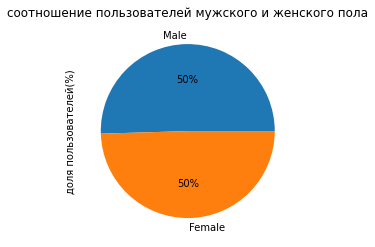

In [25]:
data_personal['gender'].value_counts().plot(kind='pie',title = 'соотношение пользователей мужского и женского пола', 
                                      ylabel= 'доля пользователей(%)', autopct ='%1.0f%%');

In [26]:
data_partner = pd.pivot_table(data_personal,index = 'gender',
                                 values = 'Dependents',columns='Partner',
                                 aggfunc = 'count')

display(data_partner.head())

Partner,No,Yes
gender,,
Female,1800,1688
Male,1841,1714


In [27]:
data_partner = pd.pivot_table(data_personal,index = 'gender',
                                 values = 'Partner',columns='Dependents',
                                 aggfunc = 'count')

display(data_partner.head())

Dependents,No,Yes
gender,,
Female,2460,1028
Male,2473,1082


In [28]:
data_partner = pd.pivot_table(data_personal,index = 'gender',
                                 values = 'Partner',columns='SeniorCitizen',
                                 aggfunc = 'count')

display(data_partner.head())

SeniorCitizen,0,1
gender,,
Female,2920,568
Male,2981,574


Собирательный образ пользователя выглядит примерно так:  
Мужчина или женщина  до пенсионного возраста,имеющие  партнера, но не имеющие детей

**Выводы 1:**  

В датасете 7 043 строк их сохраним для построения модели. Количетсво столбцов определим после предобработки данных. 
Дубликатов не найдено.   
Ежемесячные платежи варируются от 18,25 до 118,75, где наиболее популярные платежи это 18,25 в мес., и можно сделать предположение что это базовая ежемесячная стоимость услуги  
Всего 16% клиентов это пенсионеры   
Собирательный образ пользователя:  Мужчина или женщина  до пенсионного возраста,имеющие  партнера, но не имеющие детей  

Ответим на вопросы:
1) Верно ли,что пенсионеры реже расторгают контракт   
2) Верно ли,что женщины и мужчины одинаково расторгают контракт   



##  Предобработка данных,разработка моделей

ОБЪЕДИНЕНИЕ ДАТАСЕТОВ

<a id='7-bullet'></a>

In [29]:
merget_data_0 = pd.merge(data_contract,data_personal,on=['customerID'],how='left')

In [30]:
merget_data_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 715.3+ KB


In [31]:
merget_data_1 = pd.merge(merget_data_0,data_phone,on=['customerID'],how='left')

In [32]:
merget_data = pd.merge(merget_data_1,data_internet,on=['customerID'],how='left')

In [33]:
merget_data.columns = merget_data.columns.str.lower()

In [34]:
merget_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   begindate         7043 non-null   object 
 2   enddate           7043 non-null   object 
 3   type              7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   seniorcitizen     7043 non-null   int64  
 10  partner           7043 non-null   object 
 11  dependents        7043 non-null   object 
 12  multiplelines     6361 non-null   object 
 13  internetservice   5517 non-null   object 
 14  onlinesecurity    5517 non-null   object 
 15  onlinebackup      5517 non-null   object 
 16  deviceprotection  5517 non-null   object 


In [35]:
display(merget_data.tail(10))

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,partner,dependents,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
7033,9767-FFLEM,2016-12-01,No,Month-to-month,Yes,Credit card (automatic),69.50,2693.82,Male,0,No,No,No,Fiber optic,No,No,No,No,No,No
7034,0639-TSIQW,2014-03-01,2015-11-01,Month-to-month,Yes,Credit card (automatic),102.95,2059.0,Female,0,No,No,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No
7035,8456-QDAVC,2018-07-01,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1585.02,Male,0,No,No,No,Fiber optic,No,No,No,No,Yes,No
7036,7750-EYXWZ,2019-02-01,No,One year,No,Electronic check,60.65,727.8,Female,0,No,No,NaN,DSL,No,Yes,Yes,Yes,Yes,Yes
7037,2569-WGERO,2014-02-01,No,Two year,Yes,Bank transfer (automatic),21.15,1553.26,Female,0,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,2035.2,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7430.4,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,325.6,Female,0,Yes,Yes,NaN,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,2019-07-01,No,Month-to-month,Yes,Mailed check,74.40,520.8,Male,1,Yes,No,Yes,Fiber optic,No,No,No,No,No,No
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,7251.82,Male,0,No,No,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes


In [36]:
merget_data.isna().mean()

customerid          0.000000
begindate           0.000000
enddate             0.000000
type                0.000000
paperlessbilling    0.000000
paymentmethod       0.000000
monthlycharges      0.000000
totalcharges        0.000000
gender              0.000000
seniorcitizen       0.000000
partner             0.000000
dependents          0.000000
multiplelines       0.096834
internetservice     0.216669
onlinesecurity      0.216669
onlinebackup        0.216669
deviceprotection    0.216669
techsupport         0.216669
streamingtv         0.216669
streamingmovies     0.216669
dtype: float64

<a id='8-bullet'></a>

ПОИСК И ЛИКВИДАЦИЯ ПРОПУСКОВ В ДАТАСЕТЕ

начнем с анамолий,вв п.1 было выявлено что столбец totalcharges содержит данные с пробелами (' ')   
Так поле содержит  сильный разброс,то заменим на медианное значение

In [37]:
merget_data_totalcharges=merget_data.loc[merget_data['totalcharges']!=' ']
merget_data_totalcharges['totalcharges'] = merget_data_totalcharges['totalcharges'].astype(float)


/tmp/ipykernel_31/3834482338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merget_data_totalcharges['totalcharges'] = merget_data_totalcharges['totalcharges'].astype(float)


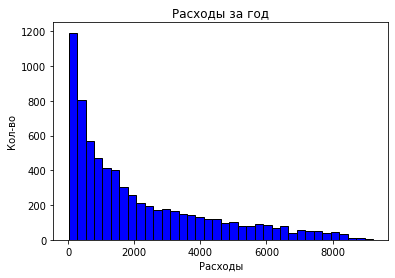

In [38]:
plt.hist(merget_data_totalcharges['totalcharges'],color='blue',edgecolor='black', bins=int(180/5))
plt.title('Расходы за год')
plt.xlabel('Расходы')
plt.ylabel('Кол-во')
plt.show();

In [39]:
sr = merget_data_totalcharges['totalcharges'].median()
display(sr)

1345.275

In [40]:
merget_data['totalcharges'] = merget_data['totalcharges'].replace(' ',sr)
merget_data['totalcharges'] = merget_data['totalcharges'].astype(float)

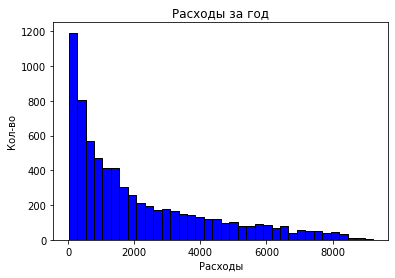

In [41]:
plt.hist(merget_data['totalcharges'],color='blue',edgecolor='black', bins=int(180/5))
plt.title('Расходы за год')
plt.xlabel('Расходы')
plt.ylabel('Кол-во')
plt.show();

Заменили пробелы средним значением и посомтрели как изменился график распределения значений   
Далее заменим пропуски в других столбцах - multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies


In [42]:
display(merget_data.loc[(merget_data['multiplelines']=='No')&(merget_data['internetservice'].isna())])


,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,partner,dependents,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
11,7469-LKBCI,2018-10-01,No,Two year,No,Credit card (automatic),18.95,312.30,Male,0,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,8191-XWSZG,2015-10-01,No,One year,No,Mailed check,20.65,1106.01,Female,0,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,1680-VDCWW,2019-02-01,No,One year,No,Bank transfer (automatic),19.80,237.60,Male,0,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1066-JKSGK,2019-11-01,No,Month-to-month,No,Mailed check,20.15,61.05,Male,0,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,7310-EGVHZ,2020-01-01,No,Month-to-month,No,Bank transfer (automatic),20.20,22.22,Male,0,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,2015-11-01,No,Two year,No,Bank transfer (automatic),20.65,1053.15,Female,0,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7019,9710-NJERN,2016-11-01,No,Two year,No,Mailed check,20.15,785.85,Female,0,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7020,9837-FWLCH,2019-02-01,No,Month-to-month,Yes,Electronic check,19.20,246.53,Male,0,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7030,0871-OPBXW,2019-12-01,No,Month-to-month,Yes,Mailed check,20.05,40.10,Female,0,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


можно сделать предположение что у пользователей у которых нет подключения телефона к нескольким линиям одновременно и нет интернета и всех сопуствующих услуг привязанных к интернету

In [43]:
merget_data['internetservice'] = np.where((merget_data['multiplelines']=='No')&
                                          (merget_data['internetservice'].isna()),'No',
                                          merget_data['internetservice'])

In [44]:
merget_data['onlinesecurity'] = np.where((merget_data['multiplelines']=='No')&
                                          (merget_data['onlinesecurity'].isna()),'No',
                                          merget_data['onlinesecurity'])

In [45]:
merget_data['deviceprotection'] = np.where((merget_data['multiplelines']=='No')&
                                          (merget_data['deviceprotection'].isna()),'No',
                                          merget_data['deviceprotection'])

In [46]:
merget_data['techsupport'] = np.where((merget_data['multiplelines']=='No')&
                                          (merget_data['techsupport'].isna()),'No',
                                          merget_data['techsupport'])

In [47]:
merget_data['streamingtv'] = np.where((merget_data['multiplelines']=='No')&
                                          (merget_data['streamingtv'].isna()),'No',
                                          merget_data['streamingtv'])

In [48]:
merget_data['streamingmovies'] = np.where((merget_data['multiplelines']=='No')&
                                          (merget_data['streamingmovies'].isna()),'No',
                                          merget_data['streamingmovies'])

In [49]:
merget_data['onlinebackup'] = np.where((merget_data['multiplelines']=='No')&
                                          (merget_data['onlinebackup'].isna()),'No',
                                          merget_data['onlinebackup'])

In [50]:
merget_data.isna().mean()

customerid          0.000000
begindate           0.000000
enddate             0.000000
type                0.000000
paperlessbilling    0.000000
paymentmethod       0.000000
monthlycharges      0.000000
totalcharges        0.000000
gender              0.000000
seniorcitizen       0.000000
partner             0.000000
dependents          0.000000
multiplelines       0.096834
internetservice     0.048559
onlinesecurity      0.048559
onlinebackup        0.048559
deviceprotection    0.048559
techsupport         0.048559
streamingtv         0.048559
streamingmovies     0.048559
dtype: float64

заменили пропуски на 'No',где были выявлены закономерности.   
остальные пропуски <5% и препологается заменить их на пустые значения

In [51]:
merget_data = merget_data.fillna(' ')

In [52]:
merget_data.isna().mean()

customerid          0.0
begindate           0.0
enddate             0.0
type                0.0
paperlessbilling    0.0
paymentmethod       0.0
monthlycharges      0.0
totalcharges        0.0
gender              0.0
seniorcitizen       0.0
partner             0.0
dependents          0.0
multiplelines       0.0
internetservice     0.0
onlinesecurity      0.0
onlinebackup        0.0
deviceprotection    0.0
techsupport         0.0
streamingtv         0.0
streamingmovies     0.0
dtype: float64

<a id='9-bullet'></a>

СОЗДАНИЕ НОВЫХ ПРИЗНАКОВ И ЦЕЛЕВОГО ПРИЗНАКА

In [53]:
merget_data['exited'] = 1
merget_data['exited'] = np.where(merget_data['enddate']=='No',0,merget_data['exited'])

In [54]:
display(merget_data.tail(10))

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,...,dependents,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,exited
7033,9767-FFLEM,2016-12-01,No,Month-to-month,Yes,Credit card (automatic),69.50,2693.82,Male,0,...,No,No,Fiber optic,No,No,No,No,No,No,0
7034,0639-TSIQW,2014-03-01,2015-11-01,Month-to-month,Yes,Credit card (automatic),102.95,2059.00,Female,0,...,No,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,1
7035,8456-QDAVC,2018-07-01,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1585.02,Male,0,...,No,No,Fiber optic,No,No,No,No,Yes,No,0
7036,7750-EYXWZ,2019-02-01,No,One year,No,Electronic check,60.65,727.80,Female,0,...,No,,DSL,No,Yes,Yes,Yes,Yes,Yes,0
7037,2569-WGERO,2014-02-01,No,Two year,Yes,Bank transfer (automatic),21.15,1553.26,Female,0,...,No,No,No,No,No,No,No,No,No,0
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,2035.20,Male,0,...,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,0
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7430.40,Female,0,...,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,0
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,325.60,Female,0,...,Yes,,DSL,Yes,No,No,No,No,No,0
7041,8361-LTMKD,2019-07-01,No,Month-to-month,Yes,Mailed check,74.40,520.80,Male,1,...,No,Yes,Fiber optic,No,No,No,No,No,No,0
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,7251.82,Male,0,...,No,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,0


Добавили новый признак(целевой) target.  по условию если контракт действует то 0,  а если расторгнут то 1

In [55]:
merget_data['begindate'] = pd.to_datetime(merget_data['begindate'], format = '%Y-%m-%d')


In [56]:
d= '2020-02-01'
d = pd.to_datetime(d,format = '%Y-%m-%d')

In [57]:
merget_data['enddate'] = np.where(merget_data['enddate']=='No',d,merget_data['enddate'])

In [58]:
merget_data['enddate'] = pd.to_datetime(merget_data['enddate'], format = '%Y-%m-%d')

In [59]:

merget_data['duration'] = merget_data['enddate'] - merget_data['begindate']


Привели дату к нужному формату(также сделали вместо значения 'No' дату = 2020-02-01 для приведения к формату). 

затем вычли из даты выгрузки дату начала (далее добавим доп условие)

In [60]:
merget_data['duration'] = merget_data['duration'].dt.days

In [61]:
display(merget_data.tail(10))

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,...,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,exited,duration
7033,9767-FFLEM,2016-12-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),69.50,2693.82,Male,0,...,No,Fiber optic,No,No,No,No,No,No,0,1157
7034,0639-TSIQW,2014-03-01,2015-11-01,Month-to-month,Yes,Credit card (automatic),102.95,2059.00,Female,0,...,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,1,610
7035,8456-QDAVC,2018-07-01,2020-02-01,Month-to-month,Yes,Bank transfer (automatic),78.70,1585.02,Male,0,...,No,Fiber optic,No,No,No,No,Yes,No,0,580
7036,7750-EYXWZ,2019-02-01,2020-02-01,One year,No,Electronic check,60.65,727.80,Female,0,...,,DSL,No,Yes,Yes,Yes,Yes,Yes,0,365
7037,2569-WGERO,2014-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),21.15,1553.26,Female,0,...,No,No,No,No,No,No,No,No,0,2191
7038,6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,2035.20,Male,0,...,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,0,730
7039,2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7430.40,Female,0,...,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,0,2191
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,325.60,Female,0,...,,DSL,Yes,No,No,No,No,No,0,337
7041,8361-LTMKD,2019-07-01,2020-02-01,Month-to-month,Yes,Mailed check,74.40,520.80,Male,1,...,Yes,Fiber optic,No,No,No,No,No,No,0,215
7042,3186-AJIEK,2014-08-01,2020-02-01,Two year,Yes,Bank transfer (automatic),105.65,7251.82,Male,0,...,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,0,2010


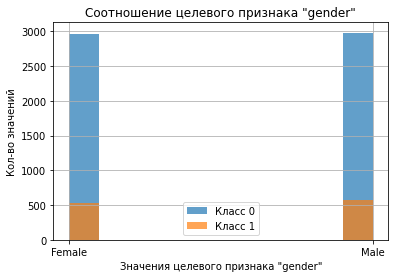

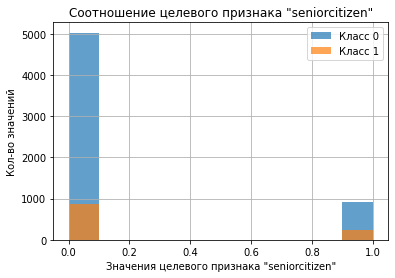

In [62]:
columns = ['gender','seniorcitizen']
for i in merget_data[columns]:
    if i not in ['customer_id']:
        for j in merget_data:
            if i == j:

                
                t0 = merget_data.loc[merget_data['exited'] == 0, i] 
                t1 = merget_data.loc[merget_data['exited'] == 1, i] 
                
                t0 = t0.rename('Класс 0') 
                t1 = t1.rename('Класс 1') 
                
                t0.hist(legend=True, alpha=.7)
                t1.hist(legend=True, alpha=.7) 
                plt.title(f'Соотношение целевого признака "{i}"')
                plt.xlabel(f'Значения целевого признака "{i}"')
                plt.ylabel('Кол-во значений')
                plt.show() 

Ответ на поставленные вопросы:   
1) Пенсионеры реже расторгают контракты (но необходимо учитывать что их меньше в общем составе)  
2) Мужчины и женщины одинаково расторгают контракты

In [63]:
merget_data = merget_data.drop(['customerid','begindate','enddate'],axis=1)

Удалили столбцы которые не нужны при моделировании 

In [64]:
merget_data = merget_data.drop(['gender','paperlessbilling'],axis=1)

Удалили столбцы которые мало значимые для модели

<a id='10-bullet'></a>

РАЗДЕЛЕНИЕ МАССИВА НА ВЫБОРКИ И МАСШТАБИРОВАНИЕ

In [65]:
features = merget_data.drop('exited',axis=1)
target = merget_data['exited']

features_train,features_test,target_train,target_test = train_test_split(features,target,
                                                                          random_state=20824, 
                                                                          test_size=0.25,stratify=target)




display(features_train.shape)
display(features_test.shape)
display(target_train.shape)
display(target_test.shape)

(5282, 16)

(1761, 16)

(5282,)

(1761,)

Перед обучением проверим баланс или дисбаланс классов,для общего понимания картины и дальнейших выводов

In [66]:
weights = {
    1:target_train.loc[target_train == 1].count() / target_train.count(), 
    0:target_train.loc[target_train == 0].count() / target_train.count()
}


weights

{1: 0.1563801590306702, 0: 0.8436198409693298}

Наблюдается дисбалансов классов в сторону клиентов которые не собираются разрывать контракт

In [67]:
features_ohe = features_train.select_dtypes(include='object').columns.to_list()
display(features_ohe)

['type',
 'paymentmethod',
 'partner',
 'dependents',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies']

In [68]:
features_train_ohe = features_train.copy()

features_test_ohe = features_test.copy()

Применим метод OneHotEncoder к обучающей выборке

In [69]:
encoder_ohe = OneHotEncoder(drop = 'first', sparse=False)
encoder_ohe.fit(features_train_ohe[features_ohe])
features_train_ohe[encoder_ohe.get_feature_names()
                  ] = encoder_ohe.transform(features_train_ohe[features_ohe])
features_train_ohe = features_train_ohe.drop(features_ohe, axis=1)


Применим метод OneHotEncoder к тестовой выборке

In [70]:
features_test_ohe[encoder_ohe.get_feature_names()
                 ] = encoder_ohe.transform(features_test_ohe[features_ohe])

features_test_ohe = features_test_ohe.drop(features_ohe, axis=1)


МОДЕЛЬ ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

<a id='11-bullet'></a>

In [71]:
model_lr = LogisticRegression(random_state=20824,class_weight='balanced')
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
           
grid_lr = GridSearchCV(model_lr, parameters,cv=5, scoring=make_scorer(roc_auc_score, greater_is_better=True))
grid_lr.fit(features_train_ohe, target_train)

        
print(grid_lr.best_params_)
print(grid_lr.best_score_)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

{'solver': 'liblinear'}
0.6927770222379152


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


МОЕДЕЛЬ СЛУЧАЙНЫЙ ЛЕС

<a id='12-bullet'></a>

In [73]:
model_rfс = RandomForestClassifier(random_state=20824)
parameters = {'n_estimators':range(1,51,10),'max_depth':range(1,11,1)}
grid_rfс = GridSearchCV(model_rfс,parameters,cv=5,scoring=make_scorer(roc_auc_score, greater_is_better=True))
grid_rfс.fit(features_train_ohe, target_train) 
grid_rfс.best_params_
grid_rfс.best_score_

0.6033227818492645

МОДЕЛЬ CatBoostClassifier

<a id='13-bullet'></a>

In [76]:
cat_features = ['type','paymentmethod','partner','dependents',
               'multiplelines','internetservice','onlinesecurity','onlinebackup','deviceprotection',
               'techsupport','streamingtv','streamingmovies']

In [77]:

model_borders = CatBoostClassifier(random_seed=20824,
                                   logging_level='Silent',boosting_type = 'Ordered',
                                   one_hot_max_size=2,l2_leaf_reg=3,leaf_estimation_method='Newton')
                                 
GridParams = {'learning_rate':[.001, .5],
              'depth':[1,4],
              'n_estimators':[100,1100,100]
             }
grid_borders = GridSearchCV(model_borders,GridParams,cv=5,scoring='roc_auc')
grid_borders.fit(features_train, target_train,cat_features=cat_features)
grid_borders.best_params_
grid_borders.best_score_

0.9089925711990435

In [78]:
display(grid_borders.best_params_)

{'depth': 4, 'learning_rate': 0.5, 'n_estimators': 1100}

Вывод:    



Тренировочная выборка feature_train, полученная из объединенного датафрейма merget_data содержит 18 столбцов и 5 282 строк.   

Тестовая выборка feature_test, полученная из объединенного датафрейма merget_data содержит 18 столбцов и 1 761 строк.    

Признак exited является целевым для обучения.  Целевой признак имеет дисбаланс. . Данный признак не содержит пропусков.   

Многие категориальные признаки содержат пропуски. Эти пропуски были обработаны и заполнены пробелами (либо NO). 

На основе метрики ROC AUC лучшие результат показала модель CatBoostClassifier    
гиперпараметры модели: {random_seed=20824,logging_level='Silent',boosting_type = 'Ordered',
                                   one_hot_max_size=2,l2_leaf_reg=3,leaf_estimation_method='Newton','depth': 4, 'n_estimators': 1100, 'learning_rate': 0.5}     
 ROC AUC =  0.9089925711990435
 
 

ТЕСТИРОВАНИЕ ЛУЧШЕЙ МОДЕЛИ (модель CatBoostClassifier)

<a id='14-bullet'></a>

In [79]:
predict_test = grid_borders.predict(features_test)
predict_proba = grid_borders.predict_proba(features_test)


АНАЛИЗ МОДЕЛИ

<a id='15-bullet'></a>

Расчет "ROC AUC" 

In [80]:

auc_roc = roc_auc_score(target_test,predict_proba[:, 1])
print('Показатель ROC AUC:',auc_roc)

Показатель ROC AUC: 0.9013348831518414


Цель проекта телеком достигнута. В результате тестирования выбранной модели(CatBoostClassifier) с подобранными гиперпараметрами получена метрика ROC AUC > параметра (0.85) более чем на 0.05.

Мерика confusion_matrix

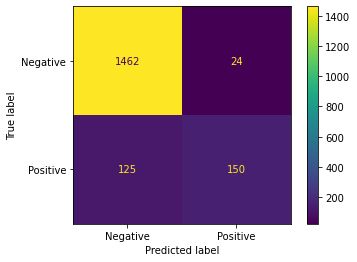

In [81]:
c_matrix = confusion_matrix(target_test, predict_test)
cmd = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=["Negative", "Positive"])
cmd.plot()
plt.show()

Модель правильно предсказывает большую часть класса 0 (договор который не планируют расторгать). Ошибки в этом случае составляют около 1%. Предсказания класса 1 (договор расторгнут) не удовлитворительные,правильно предсказано около 65% всех значений => Модель  предскажет пользователя, который не собирается расторгать договор, с остальными пользователя лучше потратить ресурс на их удержание

Метрики recall(полнота) и precision(точность)

In [82]:
print('Метрика Recall',recall_score(target_test, predict_test))

Метрика Recall 0.5454545454545454


Полнота выявляет, какую долю положительных среди всех ответов выделила модель. В данном случае модель предсказывает всего 2 из 3 клиентов,которые планируют расторгнуть контракт (класс 1)

In [83]:
print('Метрика Precision',precision_score(target_test, predict_test))

Метрика Precision 0.8620689655172413


Точность определяет, как много отрицательных ответов нашла модель, пока искала положительные. Чем больше отрицательных, тем ниже точность  


ROC кривая(график)

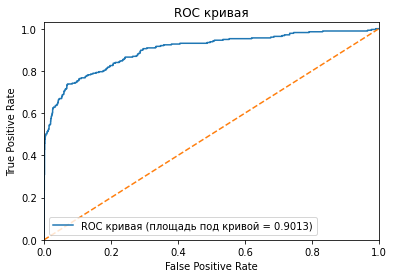

In [84]:
fpr, tpr, treshold = roc_curve(target_test, predict_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,
         label='ROC кривая (площадь под кривой = %0.4f)' % roc_auc
)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривая')
plt.legend(loc="lower left")
plt.show()

ROC кривая сильно выпуклая вверх. Модель с высоким процентом  правильно предсказывает целевые значения

Анализ важности признаков

In [85]:
model = CatBoostClassifier(random_seed=20824,logging_level='Silent',
                           boosting_type = 'Ordered',one_hot_max_size=2,
                           l2_leaf_reg=3,leaf_estimation_method='Newton',depth=4,
                           n_estimators= 1100, learning_rate = 0.5)
model.fit(features_train,target_train,cat_features=cat_features)


In [86]:
cat_importance=pd.Series(model.get_feature_importance(),features_train.columns).sort_values()

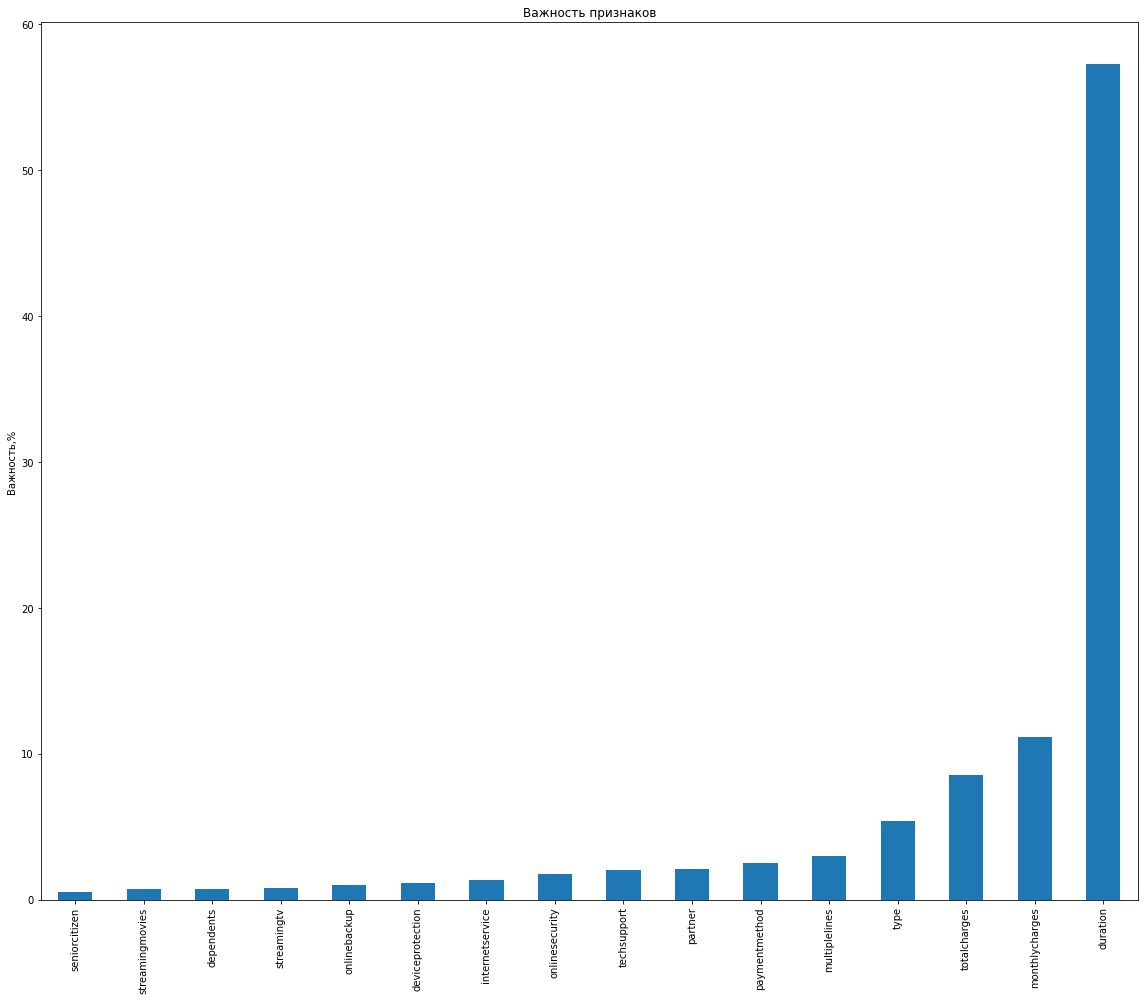

In [87]:
fig,ax = plt.subplots(figsize=(16,14))
cat_importance.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность,%')
fig.tight_layout()

Наиболее значимые признаки являются числовые признаки: 
- duration(срок действия договора)  
- monthlycharges(расходы за месяц)  
- total_charges (общие расходы абонента).   

Из категориальных выделим признак - type(тип оплаты)


##  Отчет

<a id='16-bullet'></a>

ОБЩИЙ ВЫВОД

Для предсказания ухода клиентов из компании "ТелеДом" в промышленной эксплуатации рекоммендуется использовать модель машинного обучения CatBoostClassifier с гиперпараметрами:{random_seed=20824,logging_level='Silent',boosting_type = 'Ordered', one_hot_max_size=2,l2_leaf_reg=3,leaf_estimation_method='Newton''depth': 4, 'n_estimators': 1100, 'learning_rate': 0.5}.   
При тестировании данная модель имеет значение показателя ROC AUC: 0.9013348831518414, что ~ 0,05 выше требуемого уровня заявленного заказчиком в 0.85.

Рекоммендации заказчику

Необходимо ввести автоматическое поле duration в таблицу и не упускать это поле из выгрузки. Данное поле значимое для построения модели обучения.  В дальнейшем требуется хранить целевой признак exited (он указывает на наличие или отсутствие действующего договора с клиентом)  в  системе в бинарном виде для получения исторических данных и применения в дальнейшем обучение с учителем


По выбранной модели стоит обращать внимание на пользователей, которых модель определяет как тех кто склонен к уходу. Рекомедуется делать рассылки и давать промо коды пользователям, которых модель определила с кодом 1. На пользователей,которых модель определяет (с кодом 0) не стоит затрачивать финансовые ресурсы так как модель с 99% опрееляет их как надежных (которые не обираются разрывать контракт)
Также можно расчитать бизнес-метрику такие как  финансовые потери от ухода клиента.Этот показатель важен для бизнеса и может сэкономить денежные средства собственнику. 

Работа с базой данных.Рекомендации Data инженеру.  
Типы данных стоит привести в соответсвие.  Столбец TotalCharges из файла contract_new.csv должен содержать только числовые данные(без пропусков) и без пробелов.  Стоит обратить вниманеи на пропуски в двух таблицах internet_new и phone_new, заполненные данные позволят обучать модель без предобработки и возможно улучшит ее качество.

Модель CatBoostClassifier с подобранными гиперпараметрами дает хорошие результаты метрики. На данный момент выше результаты могут показывать только нейронные сети (например  TensorFlow), заказчику стоит обратить внимание на разработку данной модели,которая может улучшить полноту и качество предсказаний.
Если заказчик решит применить только модель CatBoostClassifier,то рекомендуется поработать с дополнительными гиперпараметрами(feature_border_type,bootstrap_type)

Целевой признак: exited. 
Категориальные признаки: type,paperlessbilling,paymentmethod,gender,partner,dependents,multiplelines, internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies  
Числовые признаки: monthlycharges,total_charges, duration.	

ВЫВОДЫ О РАБОТЕ С ПРОЕКТОМ



В проекте были выбраны и задействованы модели машинного обучения LogisticRegression, RandomForestRegressor и CatBoostClassifier. По метрике ROC AUC выбрана только модель CatBoostClassifier. В перспективе ее промышленной эксплуатации на схожих данных ей будет помогать задействованные в проекте кросс-валидация и оптимизация показателей с использованием GridSearchCV.  
Удалось добиться качества модели ~ 0.9. 


Для достижения поставленной цели проекта было выполнено:

1)  В тетрадь загружены требуемые в проекте библиотеки.   
2) Загружены и проверены данные из файлов.  
3) Проведен исследовательский анализ и предобработка данных исходных датафреймов:   
    - contract_new (информация о договоре)    
    - personal_new (персональные данные клиента)  
    - internet_new (информация об интернет-услугах)  
    - phone_new (информация об услугах телефонии).    
4) Данные исходных датафреймов объеденены в единый датафрейм.    
5) Выделены тренировочные и тестовые выборки для анализа.    
6) Осуществлен исследовательский анализ и предобработка данных.   
7) Добавлен целевой признак - exited.   
8) Перед обучением удалены лишние признаки.   
9) Обучены модели машинного обучения LogisticRegression, RandomForestRegressor и CatBoostClassifier.    
10) На основе метрики ROC AUC на кросс-валидации выбрана  лучшая модель.   
11) Протестирована лучшая модель.  
12) Проведен анализ модели по основным метрикам.  
13) Сделан общий вывод по проекту "Телеком" и даны рекомендации заказчику.   

В процессе реализации проекта столкнулся со сложнастями подбора параметров в модели CatBoostClassifier, но изучив более подрбно как устроена и работает модель удалось достигнуть высокой метрики качества за счет подбора оптимальных параметров